<h1 style="color:rgb(0,120,170)">Hands-on AI I</h1>
<h2 style="color:rgb(0,120,170)">Unit 5 (Assignment) -- Convolutional neural networks </h2>

Authors: Brandstetter, Schäfl<br>
Date: 02-12-2019

This file is part of the "Hands-on AI I" lecture material. The following copyright statement applies 
to all code within this file.

Copyright statement: <br>
This  material,  no  matter  whether  in  printed  or  electronic  form,  may  be  used  for personal  and non-commercial educational use only.  Any reproduction of this manuscript, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

# Exercise 0
Before tackling all those exciting tasks of this notebook, the neccessary Python modules need to be loaded. Have a look at the notebook discussed during the lecture, and import the following modules/symbols:

- <code>u5_utils</code>
- <code>torch</code>
- <code>torch.nn</code>
- <code>torch.optim</code>
- <code>torchvision.datasets</code>
- <code>matplotlib.pyplot</code>
- <code>matplotlib.image</code>
- <code>cv2</code>
- <code>numpy</code>
- <code>types.SimpleNamespace</code>
- <code>warnings</code>

In [1]:
import u5_utils as u5
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np
from types import SimpleNamespace
import warnings
warnings.filterwarnings(r'ignore')

import torch.nn.functional as F
import os
from torchvision import datasets, transforms

Afterwards, check if the <code>torch</code> module was correctly imported, by computing the <i>median</i> of <code>[7, 2, 4, 9]</code> and printing the result.

In [2]:
torch.median(torch.as_tensor([7, 2, 4, 9], dtype=torch.float32))

tensor(4.)

# Exercise 1
Fortunately, our research dog <i>Charlie</i> agreed to help us out one more time for this assignment. He supplied us with a beautiful depiction of himself, nourishing our experiments with <i>convolutions</i> and <i>filters</i>. As always, try to get familiar with the data you're working with. To be more precise, as the <b>first task</b>, perform the following actions:
- Load a picture of Charlie (use <code>charlie_3.jpg</code>).
- Print the shape of the loaded image and describe the parts (<i>hint:</i> look at <code>imread</code> supplied by <i>matplotlib</i>).
- Visualise Charlie in his original state (<i>hint:</i> look at <code>imshow</code> supplied by <i>matplotlib</i>).

Starting with this assignment – in contrast to previous exercises, in which we provided you with various pre-defined wrappers for e.g. plotting images – you will have to use the <i>low-level</i> features supplied by the <i>imported</i> modules on your own.

The image itself has the shape (1199, 1600). The image-data has the shape (1199, 1600, 3). This means that the image has 1599 'rows' of pixels and 1200 'columns' of pixels. Moreover every pixel is defined by three values (the third dimension of the shape): a red-value, a green-value and a blue-value (RGB).


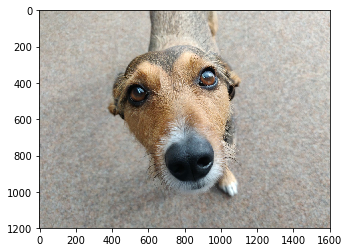

In [3]:
image = mpimg.imread('resources/charlie_3.jpg')
image_np = np.array(image)
print(f"The image itself has the shape {image_np.shape[:2]}. The image-data has the shape {image_np.shape}. This "
      "means that the image has 1599 'rows' of pixels and 1200 'columns' of pixels. Moreover every pixel is defined "
      "by three values (the third dimension of the shape): a red-value, a green-value and a blue-value (RGB).")
plt.imshow(image)

To ease any further processing of the colorful image of Charlie, a conversion to <i>grayscale</i> is appropriate. Perform the following steps:

- Print the shape of the converted image and describe the parts (<i>hint:</i> look at <code>imread</code> supplied by <i>matplotlib</i>).
- Visualise Charlie in his converted state (<i>hint:</i> look at <code>imshow</code> supplied by <i>matplotlib</i>).

Do you observe any differences with respect to the shape (when comparing the <i>grascale</i> image to the <i>colored</i> one)?

The image itself as well as the image-data have the shape (1199, 1600). Now it is only 2-dimensional. The 'lost' dimension is the one for the RGB-values, because we now don't have any color in the picture anymore.


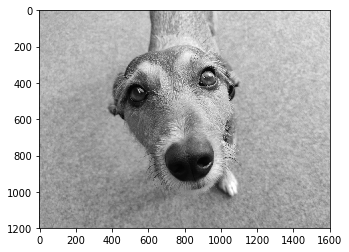

In [4]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
gray_np = np.array(gray)
print(f"The image itself as well as the image-data have the shape {gray.shape}. Now it is only 2-dimensional. The "
     "'lost' dimension is the one for the RGB-values, because we now don't have any color in the picture anymore.")
plt.imshow(gray, cmap='gray')

Before digging into <i>convolutional neural networks</i> (or any more sophisticated method), it is always a good idea to get more familiar with the <i>basics</i> first. For this very purpose, and as the <b>second task</b> of this exercise, you have to define the <i>Prewitt operator</i> for the <i>horizontal</i> as well as the <i>vertical</i> approximations of the derivatives of the <i>image intensity function</i> as <i>numpy</i> arrays:

\begin{equation}P_x = \left( 
    \begin{array}{rrr}                                
        1 & 0 & -1 \\
        1 & 0 & -1 \\
        1 & 0 & -1 \\
    \end{array}\right)
\end{equation}

\begin{equation}P_y = \left( 
    \begin{array}{rrr}                                
        1 & 1 & 1 \\
        0 & 0 & 0 \\
        -1 & -1 & -1 \\
    \end{array}\right)
\end{equation}

In [5]:
prewitt_y = np.array([[ 1, 1, 1],
                    [0, 0, 0], 
                    [-1, -1, -1]])

prewitt_x = np.array([[1, 0, -1],
                     [1, 0, -1],
                     [1, 0, -1]])

After the <i>definition</i> of both variants of the <i>Prewitt</i> operator, apply them to the <i>grayscale</i> version of <i>Charlie</i>. Moreover:

- Plot the result of the <i>horizontal Prewitt</i> operator.
- Plot the result of the <i>vertical Prewitt</i> operator.

Which parts of the image are highlighted? Do you observe any differences?

Horizontal Prewitt:


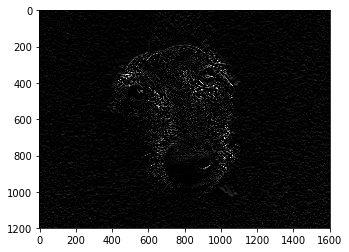

In [6]:
filtered_image_y = cv2.filter2D(gray, -1, prewitt_y)
print("Horizontal Prewitt:")
plt.imshow(filtered_image_y, cmap='gray')

Vertical Prewitt:


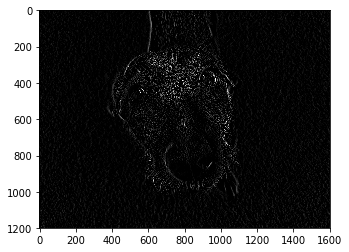

In [7]:
filtered_image_x = cv2.filter2D(gray, -1, prewitt_x)
print("Vertical Prewitt:")
plt.imshow(filtered_image_x, cmap='gray')

# Answer
Is the vertical Prewitt applied, all vertical-aligned contours are visible and highlighted. This is very well to see e.g. in the areas around Charlie where little white, vertical lines can be seen. The fur of charlie looks like its "petted down" (I mean "nach unten, vertikal gestreichelt", I don't have any better words for it).

With the horizontal Prewitt applied, the opposite is the case: horizontal-aligned contours are visible and highlighted. A good example for this are also the areas around Charlie, where in this case little white, horizontal lines can be seen. Also the fur of charlie seems "horizontal petted" (I mean "horizontal nach hinten gestreichelt", I don't have any better words for it).

To get a better feeling for <i>manually</i> constructed operators, define the <i>Scharr operator</i> for the <i>horizontal</i> as well as the <i>vertical</i> approximations of the derivatives of the <i>image intensity function</i> as <i>numpy</i> arrays:

\begin{equation}S_x = \left( 
    \begin{array}{rrr}                                
        47 & 0 & -47 \\
        162 & 0 & -162 \\
        47 & 0 & -47 \\
    \end{array}\right)
\end{equation}

\begin{equation}S_y = \left( 
    \begin{array}{rrr}                                
        47 & 162 & 47 \\
        0 & 0 & 0 \\
        -47 & -162 & -47 \\
    \end{array}\right)
\end{equation}

In [8]:
scharr_x = np.array([[47, 0, -47],
                    [162, 0, -162],
                    [47, 0, -47]])

scharr_y = np.array([[47, 162, 47],
                    [0, 0, 0],
                    [-47, -162, -47]])

After the <i>definition</i> of both variants of the <i>Scharr</i> operator, apply them to the <i>grayscale</i> version of <i>Charlie</i>. Moreover:

- Plot the result of the <i>horizontal Scharr</i> operator.
- Plot the result of the <i>vertical Scharr</i> operator.

Which parts of the image are highlighted? Do you observe any differences (with respect to <i>each other</i> as well as compared to the <i>Prewitt</i> operator)?

Horizontal Scharr:


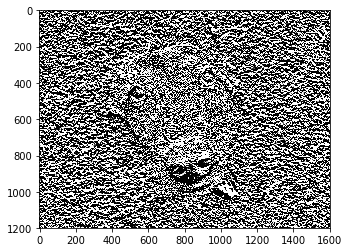

In [9]:
filtered_image_y = cv2.filter2D(gray, -1, scharr_y)
print("Horizontal Scharr:")
plt.imshow(filtered_image_y, cmap='gray')

Vertical Scharr:


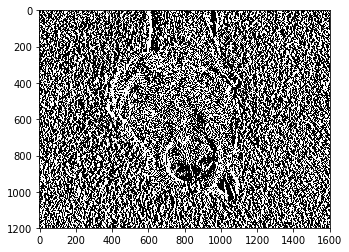

In [10]:
filtered_image_x = cv2.filter2D(gray, -1, scharr_x)
print("Vertical Scharr:")
plt.imshow(filtered_image_x, cmap='gray')

# Anwer
With respect to each other, the difference is the same as with the Prewitt-operator: Is the horziontal Scharr applied, horizontal contours are highlighted, is the vertical one applied, vertical contours are highlighted.


Compared to the Pewitt operator, big differences are visible: The Pewitt-images are much smoother than the Scharr ones. This is because the value of every pixel of the picture in a 3x3 area is multiplied by the gradients of the specific operator. All the results are then added up. If the sum is != 0 (which means there is a specific difference between the pixel-values of one side and pixel-values of the other side), an edge is detected. The Scharr operator assumes much higher gradients, therefore multiplies the pixel-values with bigger numbers. Therfore even slight differences between pixel-values on both sides can lead to sums != 0. As a result, even slight edges are detected with the Scharr operator and therefore much more than with the Pewitt operator. This differnece is well visible in the plotted images.

# Exercise 2
Up until now, <i>custom filters</i> were defined and applied on images, but as you certainly noticed, <i>no</i> neural network was involed so far. The gist of this exercise is to <i>change</i> that, and get more insight into how <i>convolutional neural networks</i> operate. For this very reason, we are assuming the following <i>filter</i> or <i>kernel</i>:

\begin{equation}F_c = \left( 
    \begin{array}{rrrrr}                                
        -1 & -0.5 & 0 & 0.5 & 1 \\
        -1 & -0.5 & 0 & 0.5 & 1 \\
        -1 & -0.5 & 0 & 0.5 & 1 \\
        -1 & -0.5 & 0 & 0.5 & 1 \\
        -1 & -0.5 & 0 & 0.5 & 1
    \end{array}\right)
\end{equation}


Thus, your <b>first task</b> of this exercise is to perform the following steps:

- Define the custom <i>filter</i> (as depicted above) as a <i>numpy</i> array.
- Create <i>three</i> additional copies of said filter, identical to the transformations as discussed during the lecture.
- Visualize all <i>four</i> filters and try to comment on the respective structures they might detect.

As a <i>hint</i>, your <i>final</i> array of filters should be of the form $\left(F_c, -F_c, F_c^T, -F_c^T\right)$.

In [11]:
f_c_1 = np.array([[-1, -0.5, 0, 0.5, 1],
               [-1, -0.5, 0, 0.5, 1],
               [-1, -0.5, 0, 0.5, 1],
               [-1, -0.5, 0, 0.5, 1],
               [-1, -0.5, 0, 0.5, 1]])

f_c_2 = -f_c_1
f_c_3 = f_c_1.T
f_c_4 = -f_c_3
filters = np.array([f_c_1, f_c_2, f_c_3, f_c_4])

In [12]:
print('Filter 1: \n', f_c_1)
print('Filter 2: \n', f_c_2)
print('Filter 3: \n', f_c_3)
print('Filter 4: \n', f_c_4)

Filter 1: 
 [[-1.  -0.5  0.   0.5  1. ]
 [-1.  -0.5  0.   0.5  1. ]
 [-1.  -0.5  0.   0.5  1. ]
 [-1.  -0.5  0.   0.5  1. ]
 [-1.  -0.5  0.   0.5  1. ]]
Filter 2: 
 [[ 1.   0.5 -0.  -0.5 -1. ]
 [ 1.   0.5 -0.  -0.5 -1. ]
 [ 1.   0.5 -0.  -0.5 -1. ]
 [ 1.   0.5 -0.  -0.5 -1. ]
 [ 1.   0.5 -0.  -0.5 -1. ]]
Filter 3: 
 [[-1.  -1.  -1.  -1.  -1. ]
 [-0.5 -0.5 -0.5 -0.5 -0.5]
 [ 0.   0.   0.   0.   0. ]
 [ 0.5  0.5  0.5  0.5  0.5]
 [ 1.   1.   1.   1.   1. ]]
Filter 4: 
 [[ 1.   1.   1.   1.   1. ]
 [ 0.5  0.5  0.5  0.5  0.5]
 [-0.  -0.  -0.  -0.  -0. ]
 [-0.5 -0.5 -0.5 -0.5 -0.5]
 [-1.  -1.  -1.  -1.  -1. ]]


# Answer
- Filter 1 and 2 will highlight vertical contours, similar to the vertical Scharr- and Prewitt-operators.
- Filter 3 and 4 will highlight horizontal contours, similar to the horizontal Scharr- and Prewitt-operators. 

There is <i>still</i> no neural network involved, but <i>now</i> is the time and place to change that.

- Transform the array of <i>custom</i> filters to a <code>torch.Tensor</code> of appropriate shape.
- Create and initialize a neural network of type <code>InitializedNet</code> using said <i>transformed</i> filters.

What is the <i>shape</i> of our custom filter tensor? Shortly describe the corresponding dimensions.

In [13]:
class MyInitializedNet(nn.Module):
    def __init__(self, weight, length_max_pool=2, width_max_pool=2):
        super(MyInitializedNet, self).__init__()
        # initializes the weights of the convolutional layer to be the weights of the defined filters
        k_height, k_width = weight.shape[2:]
        self.conv = nn.Conv2d(1, 4, kernel_size=(k_height, k_width), bias=False)
        self.conv.weight = torch.nn.Parameter(weight)
        self.pool = nn.MaxPool2d(length_max_pool, width_max_pool)

    def forward(self, x):
        conv_x = self.conv(x)
        activated_x = F.relu(conv_x)
        #activated_x = torch.sigmoid(conv_x)
        pooled_x = self.pool(activated_x)
        return conv_x, activated_x, pooled_x

In [14]:
weight1 = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model1 = MyInitializedNet(weight1)

In [15]:
weight1

tensor([[[[-1.0000, -0.5000,  0.0000,  0.5000,  1.0000],
          [-1.0000, -0.5000,  0.0000,  0.5000,  1.0000],
          [-1.0000, -0.5000,  0.0000,  0.5000,  1.0000],
          [-1.0000, -0.5000,  0.0000,  0.5000,  1.0000],
          [-1.0000, -0.5000,  0.0000,  0.5000,  1.0000]]],


        [[[ 1.0000,  0.5000, -0.0000, -0.5000, -1.0000],
          [ 1.0000,  0.5000, -0.0000, -0.5000, -1.0000],
          [ 1.0000,  0.5000, -0.0000, -0.5000, -1.0000],
          [ 1.0000,  0.5000, -0.0000, -0.5000, -1.0000],
          [ 1.0000,  0.5000, -0.0000, -0.5000, -1.0000]]],


        [[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-0.5000, -0.5000, -0.5000, -0.5000, -0.5000],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.5000,  0.5000,  0.5000,  0.5000,  0.5000],
          [ 1.0000,  1.0000,  1.0000,  1.0000,  1.0000]]],


        [[[ 1.0000,  1.0000,  1.0000,  1.0000,  1.0000],
          [ 0.5000,  0.5000,  0.5000,  0.5000,  0.5000],
          [-0.0000,

In [16]:
shape = weight1.shape
print(shape)

torch.Size([4, 1, 5, 5])


# Answer
- shape[0] represents the number of elements in the first dimension. In particular it shows the number of different filters in the tensor, so in this case 4.
- shape[1] represents the number of elements in the second dimension. In particular it shows the number of elements within the filter-arrays which is 1 ("1 filter per filter").
- shape[2] represents the number of elements in the third dimension. In particular it shows the number of rows per filter. So in this case every filter consists of 5 rows.
- shape[3] represents the number of elements in the fourth dimension. In particular it shows the number of elements in every row (and with that the number of columns). So in this case every row of every filter consists of 5 elements/every filter consists of 5 columns.

After the <i>definition</i> and <i>initialization</i> of the custom <i>model</i>, apply it to the <i>grayscale</i> version of <i>Charlie</i>.

- In contrast to the previous exercise, use <code>get_image_tensor</code> to load Charlie (again, <code>charlie_3.jpg</code>).

Moreover, in order to compare all <i>intermediate</i> steps of the network:

- Plot the result of the <i>convolutional</i> layer.
- Plot the result of the <i>activation</i> layer.
- Plot the result of the <i>pooling</i> layer.

Which parts of the image are highlighted? Do you observe any differences (with respect to <i>each other</i> as well as compared to the <i>other</i> layers)?

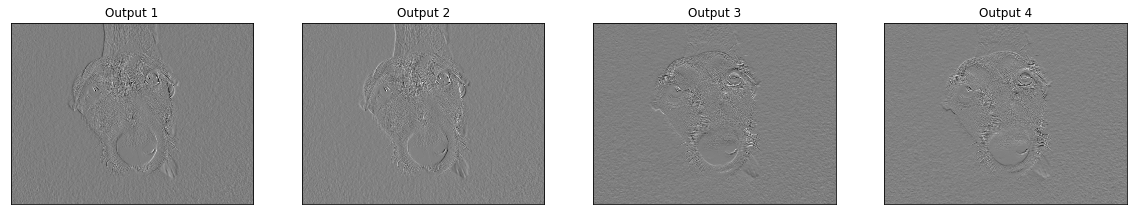

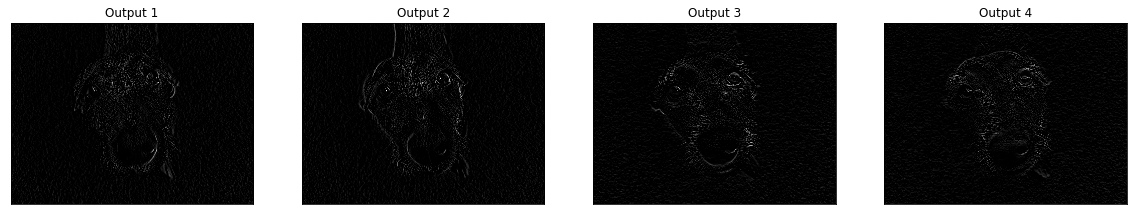

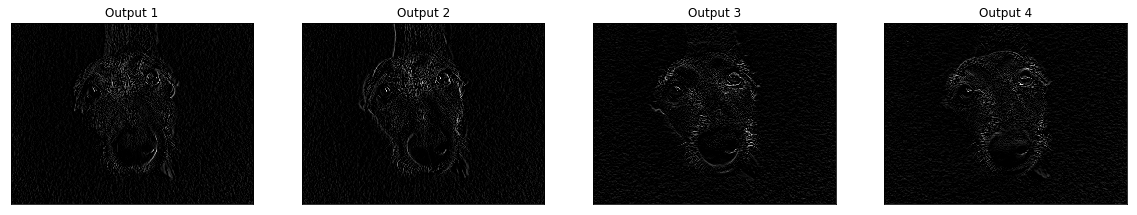

In [17]:
img_path = 'resources/charlie_3.jpg'

# gray_img_tensor = u5.get_image_tensor(img_path)
rgb = cv2.imread(img_path)
gray = cv2.cvtColor(rgb, cv2.COLOR_BGR2GRAY)
gray_img_tensor = torch.from_numpy(gray).unsqueeze(0).unsqueeze(1).float()

conv_layer1 , activated_layer1 , pooling_layer1 = model1(gray_img_tensor)
layers = [conv_layer1 , activated_layer1 , pooling_layer1]

# u5.viz_layer(conv_layer1)
# u5.viz_layer(activated_layer1)
# u5.viz_layer(pooling_layer1)
for layer in layers:
    fig = plt.figure(figsize=(20, 20))
    for i in range(4):
        ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
        ax.imshow(np.squeeze(layer[0, i].data.numpy()), cmap="gray")
        ax.set_title('Output %s' % str(i + 1))

# Answer
## Highlighted parts
In every picture, Charile himself, who clearly consists of many contours, is highlighted. Nearly everything around him isn't. 
## Differences...
### ...with respect to each other.
- The same differences occure as in the cases with the Scharr- and Pewitt-operators: With Filters 1 and 2, which are vertical filters, as kernels, the vertical contours are visible in the corresponding convolutional layers. With Filters 3 and 4, which are horizontal filters, as kernels, the horizontal contours are visible in the corresponding convolutional layers.
- All those contours are also visible in the activation and pooling layers.
- There are just little differences between the Filters 1 and 2 and between Filters 3 and 4. It appears that Filter 2 and Filter 4, which are both the negative transformation of the other filters, are producing contours which are a little bit better visible. Again, for all layers. This seems to be because the "output-values" (the sums of every pixel-value mulitplied with the corresponding gradient) of the filters are inverted: So e.g. with Filter 1 the left contour of charlies body (the left black line in the upper middle (I mean "obere Hälfte")) is black, which means that in this area the Filter returns a negative value. With Filter 2, the same line is white, which let's one conclude that the Filter has returned a positive value. The relu-activation-function now turns the negative values of Filter 1 to 0 and leaves positive values like they are. Therefore in Filter 1, the left contour of charlies body disappears after the activation step. This is not the case with Filter 2.
### ...between the layers.
- In the convolutional layer, Charlie is visible the worst. This changes with the activation layer: In this one every pixel, which has an value <0, is transformed to black, all the other pixels are left untouched. This happens through a relu function. Therefore, white pixels are better visible and distinguishable from the others.
- But Charlie is still not that good visible in the activation layer. This is because the contours are still very fine (I mean "fein, genau"). With the transformation to the pooling layer, this changes. A certain number of pixels is summarized to one which has the maximum value of all summarized pixels. Therefore, the contours will become rougher (I mean "grober") and better visible, because only the maximum of the pixels in certain areas is visible.

To get a better feeling for <i>manually</i> defined and <i>fixed</i> filters of <i>convolutional neural networks</i>, a second (slightly different) <i>kernel</i> has to be defined. The following is assumed:

\begin{equation}G_c = \left( 
    \begin{array}{rrrrr}                                
        -1 & -1 & 0.5 & 1 & 1 \\
        -1 & -1 & 0.5 & 1 & 1 \\
        -1 & -1 & 0.5 & 1 & 1 \\
        -1 & -1 & 0.5 & 1 & 1 \\
        -1 & -1 & 0.5 & 1 & 1
    \end{array}\right)
\end{equation}


Your <b>second task</b> of this exercise is to perform the following steps:

- Define the custom <i>filter</i> (as depicted above) as a <i>numpy</i> array.
- Create <i>three</i> additional copies of said filter, identical to the transformations as discussed during the lecture.
- Visualize all <i>four</i> filters and try to comment on the respective structures they might detect.

As a <i>hint</i>, your <i>final</i> array of filters should be of the form $\left(G_c, -G_c, G_c^T, -G_c^T\right)$.

In [18]:
g_c_1 = np.array([[-1, -1, 0.5, 1, 1],
                 [-1, -1, 0.5, 1, 1],
                 [-1, -1, 0.5, 1, 1],
                 [-1, -1, 0.5, 1, 1],
                 [-1, -1, 0.5, 1, 1]])

g_c_2 = -g_c_1
g_c_3 = g_c_1.T
g_c_4 = -g_c_3
filters_g = np.array([g_c_1, g_c_2, g_c_3, g_c_4])

In [19]:
print('Filter 1: \n', g_c_1)
print('Filter 2: \n', g_c_2)
print('Filter 3: \n', g_c_3)
print('Filter 4: \n', g_c_4)

Filter 1: 
 [[-1.  -1.   0.5  1.   1. ]
 [-1.  -1.   0.5  1.   1. ]
 [-1.  -1.   0.5  1.   1. ]
 [-1.  -1.   0.5  1.   1. ]
 [-1.  -1.   0.5  1.   1. ]]
Filter 2: 
 [[ 1.   1.  -0.5 -1.  -1. ]
 [ 1.   1.  -0.5 -1.  -1. ]
 [ 1.   1.  -0.5 -1.  -1. ]
 [ 1.   1.  -0.5 -1.  -1. ]
 [ 1.   1.  -0.5 -1.  -1. ]]
Filter 3: 
 [[-1.  -1.  -1.  -1.  -1. ]
 [-1.  -1.  -1.  -1.  -1. ]
 [ 0.5  0.5  0.5  0.5  0.5]
 [ 1.   1.   1.   1.   1. ]
 [ 1.   1.   1.   1.   1. ]]
Filter 4: 
 [[ 1.   1.   1.   1.   1. ]
 [ 1.   1.   1.   1.   1. ]
 [-0.5 -0.5 -0.5 -0.5 -0.5]
 [-1.  -1.  -1.  -1.  -1. ]
 [-1.  -1.  -1.  -1.  -1. ]]


# Answer
- Filter 1 and 2 will highlight vertical contours.
- Filter 3 and 4 will hilight horizontal contours.
- In general there will be more of the picture highlighted compared to the filter before. This is because even if no contour exist (therefore the sum of the gradients != 0.5 multiplied by the pixel-values will be 0 --> no contour) the (-)0.5-column/(-)0.5-row still lead to a sum != 0.

Equivalent to the <i>previous task</i> of this exercise, you are required to:

- Transform the array of <i>custom</i> filters to a <code>torch.Tensor</code> of appropriate shape.
- Create and initialize a neural network of type <code>InitializedNet</code> using said <i>transformed</i> filters.

What is the <i>shape</i> of our custom filter tensor? Shortly describe the corresponding dimensions.

In [20]:
weight2 = torch.from_numpy(filters_g).unsqueeze(1).type(torch.FloatTensor)
model2 = MyInitializedNet(weight2)

In [21]:
weight2.shape

torch.Size([4, 1, 5, 5])

# Answer
- shape[0] represents the number of elements in the first dimension. In particular it shows the number of different filters in the tensor, so in this case 4.
- shape[1] represents the number of elements in the second dimension. In particular it shows the number of elements within the filter-arrays which is 1 ("1 filter per filter").
- shape[2] represents the number of elements in the third dimension. In particular it shows the number of rows per filter. So in this case every filter consists of 5 rows.
- shape[3] represents the number of elements in the fourth dimension. In particular it shows the number of elements in every row (and with that the number of columns). So in this case every row of every filter consists of 5 elements/every filter consists of 5 columns.

After the <i>definition</i> and <i>initialization</i> of the second custom <i>model</i>, apply it to the <i>grayscale</i> version of <i>Charlie</i>.

- In contrast to the previous exercise, use <code>get_image_tensor</code> to load Charlie (again, <code>charlie_3.jpg</code>).

Moreover, in order to compare all <i>intermediate</i> steps of the network:

- Plot the result of the <i>convolutional</i> layer.
- Plot the result of the <i>activation</i> layer.
- Plot the result of the <i>pooling</i> layer.

Which parts of the image are highlighted? Do you observe any differences (with respect to <i>each other</i> as well as compared to the <i>other</i> layers)?

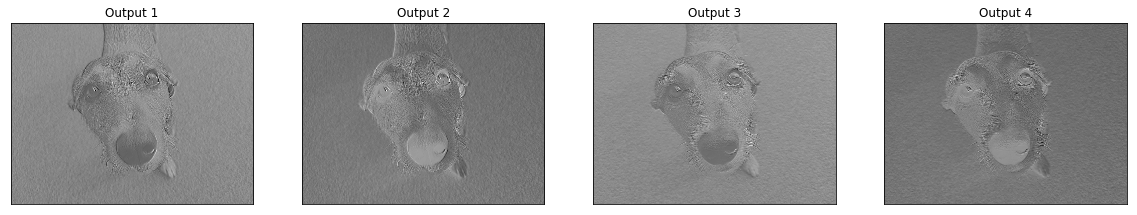

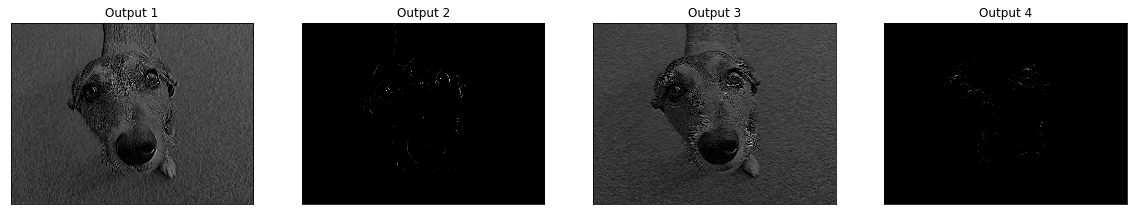

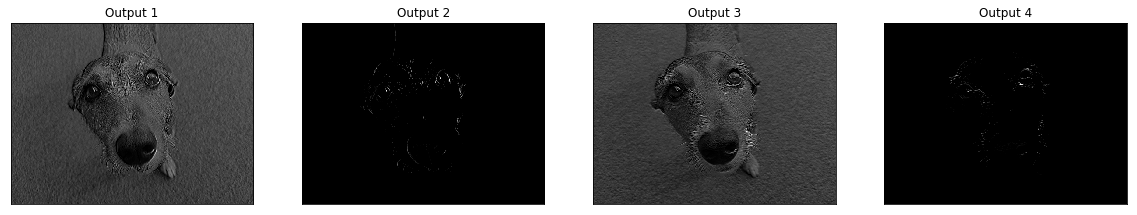

In [22]:
img_path = 'resources/charlie_3.jpg'

# gray_img_tensor = u5.get_image_tensor(img_path)
rgb = cv2.imread(img_path)
gray = cv2.cvtColor(rgb, cv2.COLOR_BGR2GRAY)
gray_img_tensor = torch.from_numpy(gray).unsqueeze(0).unsqueeze(1).float()

conv_layer2 , activated_layer2 , pooling_layer2 = model2(gray_img_tensor)
layers = [conv_layer2 , activated_layer2 , pooling_layer2]

# u5.viz_layer(conv_layer2)
# u5.viz_layer(activated_layer2)
# u5.viz_layer(pooling_layer2)
for layer in layers:
    fig = plt.figure(figsize=(20, 20))
    for i in range(4):
        ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
        ax.imshow(np.squeeze(layer[0, i].data.numpy()), cmap="gray")
        ax.set_title('Output %s' % str(i + 1))

# Answer
## Highlighted parts
In every picture of the convolutional layers, Charile himself, who clearly consists of many contours, is highlighted. In the activation- and pooling-layers he is only well visible in every second picture.
## Differences...
### ...with respect to each other.
- The same differences occure as in the cases with the Scharr- and Pewitt-operators: With Filters 1 and 2, which are vertical filters, as kernels, the vertical contours are visible in the corresponding convolutional layers. With Filters 3 and 4, which are horizontal filters, as kernels, the horizontal contours are visible in the corresponding convolutional layers.
- All those contours are also visible in the activation and pooling layers.
- Filter 2/Filter 4 produces an inverted version of the pictures produced by Filter 1/ Filter 3. This is because Filter 2/Filter 4 is exactly the negative version of Filter 1/ Filter 3.
### ...between the layers.
- In the convolutional layer Charlie is visible in every picture. This changes with the activaiton-layer: Here, Charlie is only well visible with the Filters 1 and 3 applied. This is because, as mentioned before, all these Filters nearly always return a value != 0 (because of the (-)0.5-columns/(-)0.5-rows in the middle of the filters). In particular Filter 1 and Filter 3 nearly always return a value > 0 (the middle column/row consists of + 0.5). Therefore, those values will not be eliminated by the relu-activation-function. Filter 2 and Filter 4, the negative versions of the other two filters, nearly always return a value < 0 (the middle column/row consists of - 0.5). Therefore, those values will be converted to 0 by the relu-activaiton-funciton. This is also visible: In the activaiton layer the pictures with Filter 2/4 applied are practically black, wheras in the pictures where Filter 1/3 were applied, nearly no black spots can be found.

# Exercise 3

As you are now an expert in defining and applying <i>custom kernels</i>, we will now move on to <i>automatically</i> learn <i>kernels</i> to create more expressive <i>systems</i>. For the <b>first task</b> of this exercise, define an <i>instance</i> of the type <code>SimpleNamespace</code>, and set the hyperparameters accordingly:

- <code>batch_size = 64</code>
- <code>test_batch_size = 1000</code>
- <code>epochs = 5</code>
- <code>lr = 0.001</code>
- <code>momentum = 0.9</code>

The field <code>log_interval</code> can be chosen freely as well as the <i>device</i> on which to compute.

In [23]:
args00 = SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=5,
                       lr=0.001, momentum=0.9, log_interval=100)
device = torch.device('cpu')
use_cuda = torch.cuda.is_available()

In this exercise you will be working with a data set composed of various <i>images</i> of fashion items. For curious minds, more information regarding this data set can be found at (maybe it looks already familiar to you):

<cite>Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms. Han Xiao, Kashif Rasul, Roland Vollgraf. arXiv:1708.07747</cite>

Moreover, perform the following steps in order to get started <i>filtering</i> image data using <i>convolutional</i> neural networks:

- Set the <i>random seed</i> to $s = 42$ using the <i>PyTorch</i> interface.
- Load the <i>Fashion-MNIST</i> data set (returns the <i>training</i> as well as the <i>test</i> set data loader).
- Display the first <i>four</i> images of the <i>Fashion-MNIST</i> data set.

Can you identify possible <i>labels</i> of the four images?

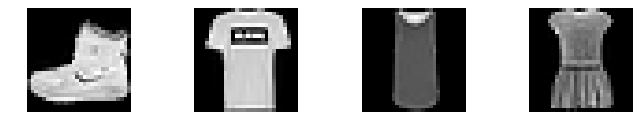

In [24]:
torch.manual_seed(42)
# train_loader, test_loader = u5.get_MNIST_data(args00, use_cuda)

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}

train_loader = torch.utils.data.DataLoader(datasets.FashionMNIST(os.path.join('data'), train=True, download=True,
                                            transform=transforms.Compose([transforms.ToTensor()])), 
                                            batch_size=args00.batch_size, shuffle=True, **kwargs)

test_loader = torch.utils.data.DataLoader(datasets.FashionMNIST(os.path.join('data'), train=False, 
                                            transform=transforms.Compose([transforms.ToTensor()])),
                                            batch_size=args00.test_batch_size, shuffle=True, **kwargs)


#u5.display_FashionMNIST(train_loader, 4)
transform_to_PIL = transforms.ToPILImage()
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(9.5, 2))
for index in range(4):
    ax[index].axis(r'off')
    ax[index].imshow(transform_to_PIL(train_loader.dataset[index][0][0]), cmap='gray')
fig.tight_layout()

# Answer
## Possible labels
- Picture 1: shoe
- Picture 2: t-shirt
- Picture 3: skirt
- Picture 4: dress

In order to define a model based on <i>convolutional</i> as well as a <i>dense feedforward layers</i> for identifying images as visualized above, some minimal knowledge about the <i>structure</i> of the images is required:

- Find out the amount of <i>input channels</i> of the data set.
- Set the output dimensionality to be $d_{out} = 10$.

In [25]:
image_shape = train_loader.dataset[0][0].shape
print(r'Shape of an image: {}'.format(tuple(image_shape)))
print(f'Input channels: {image_shape[0]}')
output_dim = 10

Shape of an image: (1, 28, 28)
Input channels: 1


# Answer
image_shape[0] defines the number of input channels. Therefore, there is only 1 input channel (which can be also found out by seeing that the images are not in color)

On the basis of the <i>neural network</i> implementation of the lecture, construct a <i>convolutional neural network</i> with the following attributes (to get you started, later on you will modify these settings in order to get a better performance on the corresponding test set):

- One <i>convolutional</i> input layer, accepting images of the <i>Fashion-MNIST</i> data set.
- Two <i>dense</i> hidden layers with an input as well as output dimensionality of $128$ each.
- One <i>dense</i> output layer, with an output dimensionality as defined previously.
- As the nonlinearity, <i>rectified linear units</i> should be applied.

To summarize your <b>second task</b> of this exercise:

- Implement a <i>Python class</i> <code>ConvolutionalNeuralNet</code> as discussed during the lecture.
- Keep in mind, which <i>activation</i> function a <i>multi-class</i> setting requires.
- Optionally, <i>initialize</i> the parameters of the model in a different way.

In [26]:
class ConvolutionalNeuralNet(nn.Module):
    def __init__(self):
        super(ConvolutionalNeuralNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, 5)
        self.fc1 = nn.Linear(128, 128)
        self.fc2 = nn.Linear(128, 128)
        self.output = nn.Linear(128, 10)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 6, 6)
        x = x.view(-1, 8*4*4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.log_softmax(self.output(x), dim=1)
        return x

# Optional initialization with variable input- and output-dimensions passed to the class as parameters
class ConvolutionalNeuralNet_opt(nn.Module):
    def __init__(self, input_channels, output_dim):
        super(ConvolutionalNeuralNet_opt, self).__init__()
        self.conv1 = nn.Conv2d(input_channels, 8, 5)
        self.fc1 = nn.Linear(128, 128)
        self.fc2 = nn.Linear(128, 128)
        self.output = nn.Linear(128, output_dim)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 6, 6)
        x = x.view(-1, 8*4*4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.log_softmax(self.output(x), dim=1)
        return x

Train the previously defined <i>convolutional neural network</i> model by applying the corresponding <i>data loader</i> (keep in mind for which set we want the model to be <i>trained</i>) as well as the <i>optimizer</i>. Report the performance on the <i>test set</i> afterwards. Experiment with different hyperparameter settings, for instance set different values for $\ldots$

- $\ldots$ the learning rate <code>lr</code>.
- $\ldots$ the momentum term <code>momentum</code>.
- $\ldots$ the amount of epochs <code>epochs</code>.

Do you notice any serious differences? If yes, which <i>settings</i> lead to them? If not, try to argue about a <i>possible</i> reason.

In [27]:
model_00 = ConvolutionalNeuralNet().to(device)
optimizer00 = optim.SGD(model_00.parameters(), lr=args00.lr, 
                      momentum=args00.momentum)

for epoch in range(1, args00.epochs + 1):
    u5.train(args00, model_00, device, train_loader, optimizer00, epoch)
    u5.test(args00, model_00, device, test_loader)

Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.298546
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.287869
Train Epoch: 1 [19200/60000 (32%)]	Loss: 2.284425
Train Epoch: 1 [25600/60000 (43%)]	Loss: 2.249964
Train Epoch: 1 [32000/60000 (53%)]	Loss: 2.208373
Train Epoch: 1 [38400/60000 (64%)]	Loss: 2.068302
Train Epoch: 1 [44800/60000 (75%)]	Loss: 1.806329
Train Epoch: 1 [51200/60000 (85%)]	Loss: 1.305211
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.971514
Train Epoch: 1 [60000/60000 (100%)]	Loss: 1.192938

Test set: Average loss: 0.0012, Accuracy: 5424/10000 (54.24%)

Train Epoch: 2 [6400/60000 (11%)]	Loss: 1.007853
Train Epoch: 2 [12800/60000 (21%)]	Loss: 1.134654
Train Epoch: 2 [19200/60000 (32%)]	Loss: 1.010536
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.922974
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.825561
Train Epoch: 2 [38400/60000 (64%)]	Loss: 1.063210
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.910544
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.883565
Train Epoch: 2 [57600/60000 (96%)]	Lo

In [28]:
def training(args):
    model = ConvolutionalNeuralNet().to(device)
    optimizer = optim.SGD(model.parameters(), lr=args.lr, 
                      momentum=args.momentum)
    
    for epoch in range(1, args.epochs + 1):
        u5.train(args, model, device, train_loader, optimizer, epoch)
        u5.test(args, model, device, test_loader)
    
    return model

In [29]:
# lr = 0.0000000001

args01 = SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=5,
                       lr=0.0000000001, momentum=0.9, log_interval=100)
model_01 = training(args01)

Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.310159
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.294283
Train Epoch: 1 [19200/60000 (32%)]	Loss: 2.305765
Train Epoch: 1 [25600/60000 (43%)]	Loss: 2.303397
Train Epoch: 1 [32000/60000 (53%)]	Loss: 2.309721
Train Epoch: 1 [38400/60000 (64%)]	Loss: 2.294935
Train Epoch: 1 [44800/60000 (75%)]	Loss: 2.310830
Train Epoch: 1 [51200/60000 (85%)]	Loss: 2.310807
Train Epoch: 1 [57600/60000 (96%)]	Loss: 2.311232
Train Epoch: 1 [60000/60000 (100%)]	Loss: 2.285612

Test set: Average loss: 0.0023, Accuracy: 834/10000 (8.34%)

Train Epoch: 2 [6400/60000 (11%)]	Loss: 2.307994
Train Epoch: 2 [12800/60000 (21%)]	Loss: 2.294541
Train Epoch: 2 [19200/60000 (32%)]	Loss: 2.314583
Train Epoch: 2 [25600/60000 (43%)]	Loss: 2.302282
Train Epoch: 2 [32000/60000 (53%)]	Loss: 2.311300
Train Epoch: 2 [38400/60000 (64%)]	Loss: 2.292429
Train Epoch: 2 [44800/60000 (75%)]	Loss: 2.297448
Train Epoch: 2 [51200/60000 (85%)]	Loss: 2.301166
Train Epoch: 2 [57600/60000 (96%)]	Loss

In [30]:
# lr = 0.01

args02 = SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=5,
                       lr=0.01, momentum=0.9, log_interval=100)
model_02 = training(args02)

Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.566630
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.837388
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.693199
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.568364
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.506588
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.713550
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.449387
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.563993
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.402260
Train Epoch: 1 [60000/60000 (100%)]	Loss: 0.679595

Test set: Average loss: 0.0005, Accuracy: 7976/10000 (79.76%)

Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.459404
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.337519
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.518296
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.369345
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.453300
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.531647
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.662523
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.335064
Train Epoch: 2 [57600/60000 (96%)]	Lo

In [31]:
# lr = 1000

args03 = SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=5,
                       lr=1000, momentum=0.9, log_interval=100)
model_03 = training(args03)

Train Epoch: 1 [6400/60000 (11%)]	Loss: 1516.950195
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2431.492920
Train Epoch: 1 [19200/60000 (32%)]	Loss: 2265.554688
Train Epoch: 1 [25600/60000 (43%)]	Loss: 1225.798584
Train Epoch: 1 [32000/60000 (53%)]	Loss: 664.167297
Train Epoch: 1 [38400/60000 (64%)]	Loss: 1938.782471
Train Epoch: 1 [44800/60000 (75%)]	Loss: 1629.312012
Train Epoch: 1 [51200/60000 (85%)]	Loss: 2460.561035
Train Epoch: 1 [57600/60000 (96%)]	Loss: 1468.489380
Train Epoch: 1 [60000/60000 (100%)]	Loss: 1236.522339

Test set: Average loss: 1.7123, Accuracy: 1000/10000 (10.00%)

Train Epoch: 2 [6400/60000 (11%)]	Loss: 2515.070312
Train Epoch: 2 [12800/60000 (21%)]	Loss: 2318.534912
Train Epoch: 2 [19200/60000 (32%)]	Loss: 982.468506
Train Epoch: 2 [25600/60000 (43%)]	Loss: 2185.732910
Train Epoch: 2 [32000/60000 (53%)]	Loss: 2610.510986
Train Epoch: 2 [38400/60000 (64%)]	Loss: 1773.918579
Train Epoch: 2 [44800/60000 (75%)]	Loss: 1862.190430
Train Epoch: 2 [51200/60000 (85%)]	Los

In [32]:
# momentum = 0.00000001

args04 = SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=5,
                       lr=0.001, momentum=0.00000001, log_interval=100)
model_04 = training(args04)

Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.305066
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.301733
Train Epoch: 1 [19200/60000 (32%)]	Loss: 2.297892
Train Epoch: 1 [25600/60000 (43%)]	Loss: 2.310749
Train Epoch: 1 [32000/60000 (53%)]	Loss: 2.289463
Train Epoch: 1 [38400/60000 (64%)]	Loss: 2.293294
Train Epoch: 1 [44800/60000 (75%)]	Loss: 2.279562
Train Epoch: 1 [51200/60000 (85%)]	Loss: 2.275327
Train Epoch: 1 [57600/60000 (96%)]	Loss: 2.290807
Train Epoch: 1 [60000/60000 (100%)]	Loss: 2.265794

Test set: Average loss: 0.0023, Accuracy: 1505/10000 (15.05%)

Train Epoch: 2 [6400/60000 (11%)]	Loss: 2.281740
Train Epoch: 2 [12800/60000 (21%)]	Loss: 2.274889
Train Epoch: 2 [19200/60000 (32%)]	Loss: 2.267170
Train Epoch: 2 [25600/60000 (43%)]	Loss: 2.282256
Train Epoch: 2 [32000/60000 (53%)]	Loss: 2.262651
Train Epoch: 2 [38400/60000 (64%)]	Loss: 2.275083
Train Epoch: 2 [44800/60000 (75%)]	Loss: 2.260692
Train Epoch: 2 [51200/60000 (85%)]	Loss: 2.271043
Train Epoch: 2 [57600/60000 (96%)]	Lo

In [33]:
# momentum = 0.5

args05 = SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=5,
                       lr=0.001, momentum=0.5, log_interval=100)
model_05 = training(args05)

Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.292321
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.307436
Train Epoch: 1 [19200/60000 (32%)]	Loss: 2.295298
Train Epoch: 1 [25600/60000 (43%)]	Loss: 2.299825
Train Epoch: 1 [32000/60000 (53%)]	Loss: 2.295388
Train Epoch: 1 [38400/60000 (64%)]	Loss: 2.279617
Train Epoch: 1 [44800/60000 (75%)]	Loss: 2.276271
Train Epoch: 1 [51200/60000 (85%)]	Loss: 2.269937
Train Epoch: 1 [57600/60000 (96%)]	Loss: 2.254640
Train Epoch: 1 [60000/60000 (100%)]	Loss: 2.247721

Test set: Average loss: 0.0023, Accuracy: 3009/10000 (30.09%)

Train Epoch: 2 [6400/60000 (11%)]	Loss: 2.267095
Train Epoch: 2 [12800/60000 (21%)]	Loss: 2.248395
Train Epoch: 2 [19200/60000 (32%)]	Loss: 2.238914
Train Epoch: 2 [25600/60000 (43%)]	Loss: 2.242789
Train Epoch: 2 [32000/60000 (53%)]	Loss: 2.216908
Train Epoch: 2 [38400/60000 (64%)]	Loss: 2.198279
Train Epoch: 2 [44800/60000 (75%)]	Loss: 2.184563
Train Epoch: 2 [51200/60000 (85%)]	Loss: 2.163617
Train Epoch: 2 [57600/60000 (96%)]	Lo

In [34]:
# momentum = 0.999

args06 = SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=5,
                       lr=0.001, momentum=0.999, log_interval=100)
model_06 = training(args06)

Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.273037
Train Epoch: 1 [12800/60000 (21%)]	Loss: 1.368976
Train Epoch: 1 [19200/60000 (32%)]	Loss: 1.330022
Train Epoch: 1 [25600/60000 (43%)]	Loss: 1.159418
Train Epoch: 1 [32000/60000 (53%)]	Loss: 1.212659
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.919704
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.848110
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.483964
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.615914
Train Epoch: 1 [60000/60000 (100%)]	Loss: 0.846921

Test set: Average loss: 0.0008, Accuracy: 7473/10000 (74.73%)

Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.857005
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.545520
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.544032
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.723097
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.735193
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.725759
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.742142
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.425648
Train Epoch: 2 [57600/60000 (96%)]	Lo

In [35]:
# epochs = 1

args07 = SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=1,
                       lr=0.001, momentum=0.9, log_interval=100)
model_07 = training(args07)

Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.298442
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.290889
Train Epoch: 1 [19200/60000 (32%)]	Loss: 2.288751
Train Epoch: 1 [25600/60000 (43%)]	Loss: 2.284192
Train Epoch: 1 [32000/60000 (53%)]	Loss: 2.265820
Train Epoch: 1 [38400/60000 (64%)]	Loss: 2.234401
Train Epoch: 1 [44800/60000 (75%)]	Loss: 2.193966
Train Epoch: 1 [51200/60000 (85%)]	Loss: 2.066001
Train Epoch: 1 [57600/60000 (96%)]	Loss: 1.732073
Train Epoch: 1 [60000/60000 (100%)]	Loss: 1.593561

Test set: Average loss: 0.0016, Accuracy: 4704/10000 (47.04%)



In [36]:
# epochs = 20

args08 = SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=20,
                       lr=0.001, momentum=0.9, log_interval=100)
model_08 = training(args08)

Train Epoch: 01 [6400/60000 (11%)]	Loss: 2.299801
Train Epoch: 01 [12800/60000 (21%)]	Loss: 2.286225
Train Epoch: 01 [19200/60000 (32%)]	Loss: 2.263713
Train Epoch: 01 [25600/60000 (43%)]	Loss: 2.250135
Train Epoch: 01 [32000/60000 (53%)]	Loss: 2.211215
Train Epoch: 01 [38400/60000 (64%)]	Loss: 2.102890
Train Epoch: 01 [44800/60000 (75%)]	Loss: 1.817011
Train Epoch: 01 [51200/60000 (85%)]	Loss: 1.386761
Train Epoch: 01 [57600/60000 (96%)]	Loss: 1.149292
Train Epoch: 01 [60000/60000 (100%)]	Loss: 1.039359

Test set: Average loss: 0.0011, Accuracy: 5677/10000 (56.77%)

Train Epoch: 02 [6400/60000 (11%)]	Loss: 0.891961
Train Epoch: 02 [12800/60000 (21%)]	Loss: 1.149350
Train Epoch: 02 [19200/60000 (32%)]	Loss: 0.937654
Train Epoch: 02 [25600/60000 (43%)]	Loss: 1.139843
Train Epoch: 02 [32000/60000 (53%)]	Loss: 1.258674
Train Epoch: 02 [38400/60000 (64%)]	Loss: 0.900595
Train Epoch: 02 [44800/60000 (75%)]	Loss: 0.875120
Train Epoch: 02 [51200/60000 (85%)]	Loss: 0.884578
Train Epoch: 02 [57

Train Epoch: 15 [32000/60000 (53%)]	Loss: 0.290509
Train Epoch: 15 [38400/60000 (64%)]	Loss: 0.350758
Train Epoch: 15 [44800/60000 (75%)]	Loss: 0.362942
Train Epoch: 15 [51200/60000 (85%)]	Loss: 0.397204
Train Epoch: 15 [57600/60000 (96%)]	Loss: 0.503725
Train Epoch: 15 [60000/60000 (100%)]	Loss: 0.325166

Test set: Average loss: 0.0005, Accuracy: 8314/10000 (83.14%)

Train Epoch: 16 [6400/60000 (11%)]	Loss: 0.229278
Train Epoch: 16 [12800/60000 (21%)]	Loss: 0.390791
Train Epoch: 16 [19200/60000 (32%)]	Loss: 0.502989
Train Epoch: 16 [25600/60000 (43%)]	Loss: 0.438472
Train Epoch: 16 [32000/60000 (53%)]	Loss: 0.449844
Train Epoch: 16 [38400/60000 (64%)]	Loss: 0.276399
Train Epoch: 16 [44800/60000 (75%)]	Loss: 0.412620
Train Epoch: 16 [51200/60000 (85%)]	Loss: 0.412765
Train Epoch: 16 [57600/60000 (96%)]	Loss: 0.360953
Train Epoch: 16 [60000/60000 (100%)]	Loss: 0.458663

Test set: Average loss: 0.0004, Accuracy: 8438/10000 (84.38%)

Train Epoch: 17 [6400/60000 (11%)]	Loss: 0.500161
Train

# Answer
- A very low learning rate causes the loss and the accuracy to stay nearly exactly the same every epoch. This is because the parameters of the model bearly change (only by e.g. 0.0000001 * gradient, so practically by 0). Therefore, the model and with that the loss and accuracy don't change.
- A very high learning rate leads to a very high loss and a steady accuracy of 10%. In the previous assignments with different Neural Networks this wasn't exactly the case. There, a high learning rate led to strongly changing results every epoch.

- A very low momentum causes the accuracy of the first epoch to be very low and the loss to be relatively high. Therfore, much more epochs are needed to get a good result.
- A very high momentum near 1 causes the accuracy of the first epoch to be relatively high and the loss low. Therefore, less epochs are needed to get a good result.

- It can also be witnessed that relatively many epochs are needed to get the best result: Even at the 20th epoch the accuracy and loss is still changing significantly. With only one epoch, the results are not that good.

As already discussing during the lecture and experimented with during the <i>last</i> assignments, simply <i>inverting</i> the original images on which the model is trained, may already be enough to break it. This time, to spice things a little bit up, we do not <i>flip</i> the images, but <i>rotate</i> them by a specified <i>degree</i>. To show this behavior, perform the following steps:

- Set the <i>random seed</i> to $s = 42$ using the <i>PyTorch</i> interface.
- Load the <i>Fashion-MNIST</i> data set with <code>degrees</code> set to $d = 42$.
- Display the first <i>four</i> images of the <i>Fashion-MNIST</i> data set.

Can you identify possible <i>labels</i> of the four images? How do they differ from the previous visualization?

- Evaluate the previously trained <i>convolutional neural network</i> on the flipped data set.

If you experiment with different <i>hyperparameter settings</i> with respect to the original data set, do the performances differ when tested on the <i>flipped</i> data set?

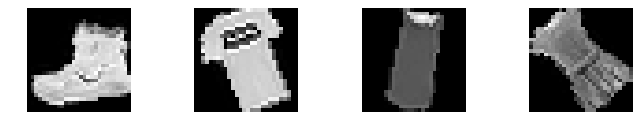

In [37]:
torch.manual_seed(42)

train_loader_rotated = torch.utils.data.DataLoader(datasets.FashionMNIST(os.path.join('data'), train=True, download=True,
                                            transform=transforms.Compose([transforms.RandomRotation(degrees=42),
                                                                          transforms.ToTensor()])), 
                                            batch_size=args00.batch_size, shuffle=True, **kwargs)

test_loader_rotated = torch.utils.data.DataLoader(datasets.FashionMNIST(os.path.join('data'), train=False, 
                                            transform=transforms.Compose([transforms.RandomRotation(degrees=42),
                                                                          transforms.ToTensor()])),
                                            batch_size=args00.test_batch_size, shuffle=True, **kwargs)

transform_to_PIL = transforms.ToPILImage()
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(9.5, 2))
for index in range(4):
    ax[index].axis(r'off')
    ax[index].imshow(transform_to_PIL(train_loader_rotated.dataset[index][0][0]), cmap='gray')
fig.tight_layout()

# Answer
In this case I would label the pictures the same as before. 

In [38]:
print(f"Model: model_00, Arguments: {args00}\n")
u5.test(args01, model_00, device, test_loader_rotated)

print(f"Model: model_01, Arguments: {args01}\n")
u5.test(args01, model_01, device, test_loader_rotated)

print(f"Model: model_02, Arguments: {args02}\n")
u5.test(args02, model_02, device, test_loader_rotated)

print(f"Model: model_03, Arguments: {args03}\n")
u5.test(args03, model_03, device, test_loader_rotated)

print(f"Model: model_04, Arguments: {args04}\n")
u5.test(args04, model_04, device, test_loader_rotated)

print(f"Model: model_05, Arguments: {args05}\n")
u5.test(args05, model_05, device, test_loader_rotated)

print(f"Model: model_06, Arguments: {args06}\n")
u5.test(args06, model_06, device, test_loader_rotated)

print(f"Model: model_07, Arguments: {args07}\n")
u5.test(args07, model_07, device, test_loader_rotated)

print(f"Model: model_08, Arguments: {args08}\n")
u5.test(args08, model_08, device, test_loader_rotated)

Model: model_00, Arguments: namespace(batch_size=64, epochs=5, log_interval=100, lr=0.001, momentum=0.9, test_batch_size=1000)


Test set: Average loss: 0.0018, Accuracy: 5003/10000 (50.03%)

Model: model_01, Arguments: namespace(batch_size=64, epochs=5, log_interval=100, lr=1e-10, momentum=0.9, test_batch_size=1000)


Test set: Average loss: 0.0023, Accuracy: 946/10000 (9.46%)

Model: model_02, Arguments: namespace(batch_size=64, epochs=5, log_interval=100, lr=0.01, momentum=0.9, test_batch_size=1000)


Test set: Average loss: 0.0017, Accuracy: 5048/10000 (50.48%)

Model: model_03, Arguments: namespace(batch_size=64, epochs=5, log_interval=100, lr=1000, momentum=0.9, test_batch_size=1000)


Test set: Average loss: 1.6371, Accuracy: 1000/10000 (10.00%)

Model: model_04, Arguments: namespace(batch_size=64, epochs=5, log_interval=100, lr=0.001, momentum=1e-08, test_batch_size=1000)


Test set: Average loss: 0.0019, Accuracy: 3699/10000 (36.99%)

Model: model_05, Arguments: namespace(batc

# Answer
In general, the performance on the flipped dataset is much lower than on the original one. Moreover the differences between the results on the flipped dataset of the models with different hyperparameters are more or less the same than before: E.g. more epochs lead to a better performance (20 epochs: 52.3% accuracy) than less epochs (1 epoch: 38.5% accuracy). A high momentum causes better results than a low one.